# plot_decision_regions

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')



# Zadanie

## 1. Rozdziel zestaw danych na podzbiory uczący i testowy,

In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [1,2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## 2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty. 
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy którą można wykorzystać do kostrukcji drzewa decyzyjnego znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

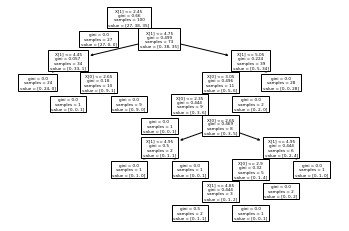

In [61]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf_gini)
plt.show()

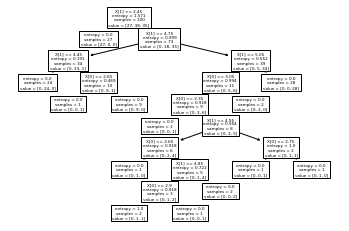

In [62]:
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(X_train, y_train)
tree.plot_tree(clf_entropy)
plt.show()

In [63]:
clf_gini.score(X_test, y_test)

0.96

In [64]:
clf_entropy.score(X_test, y_test)

0.96

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit


from sklearn.model_selection import learning_curve

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    clf_entropy, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    clf_gini, **common_params
)

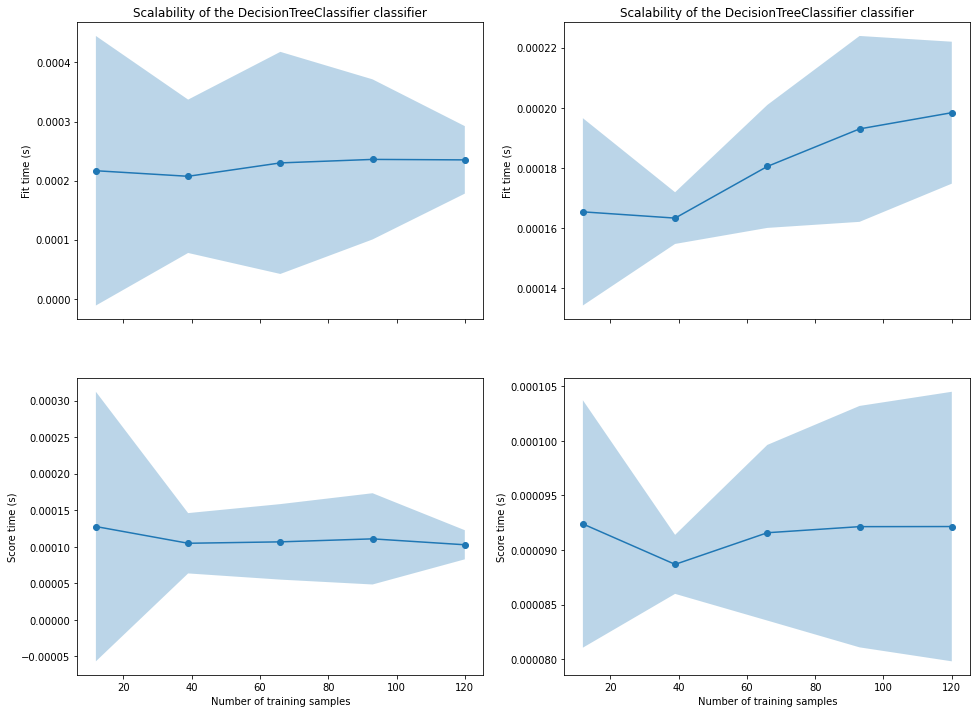

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [score_times_nb, score_times_svm],
        [clf_entropy, clf_gini],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

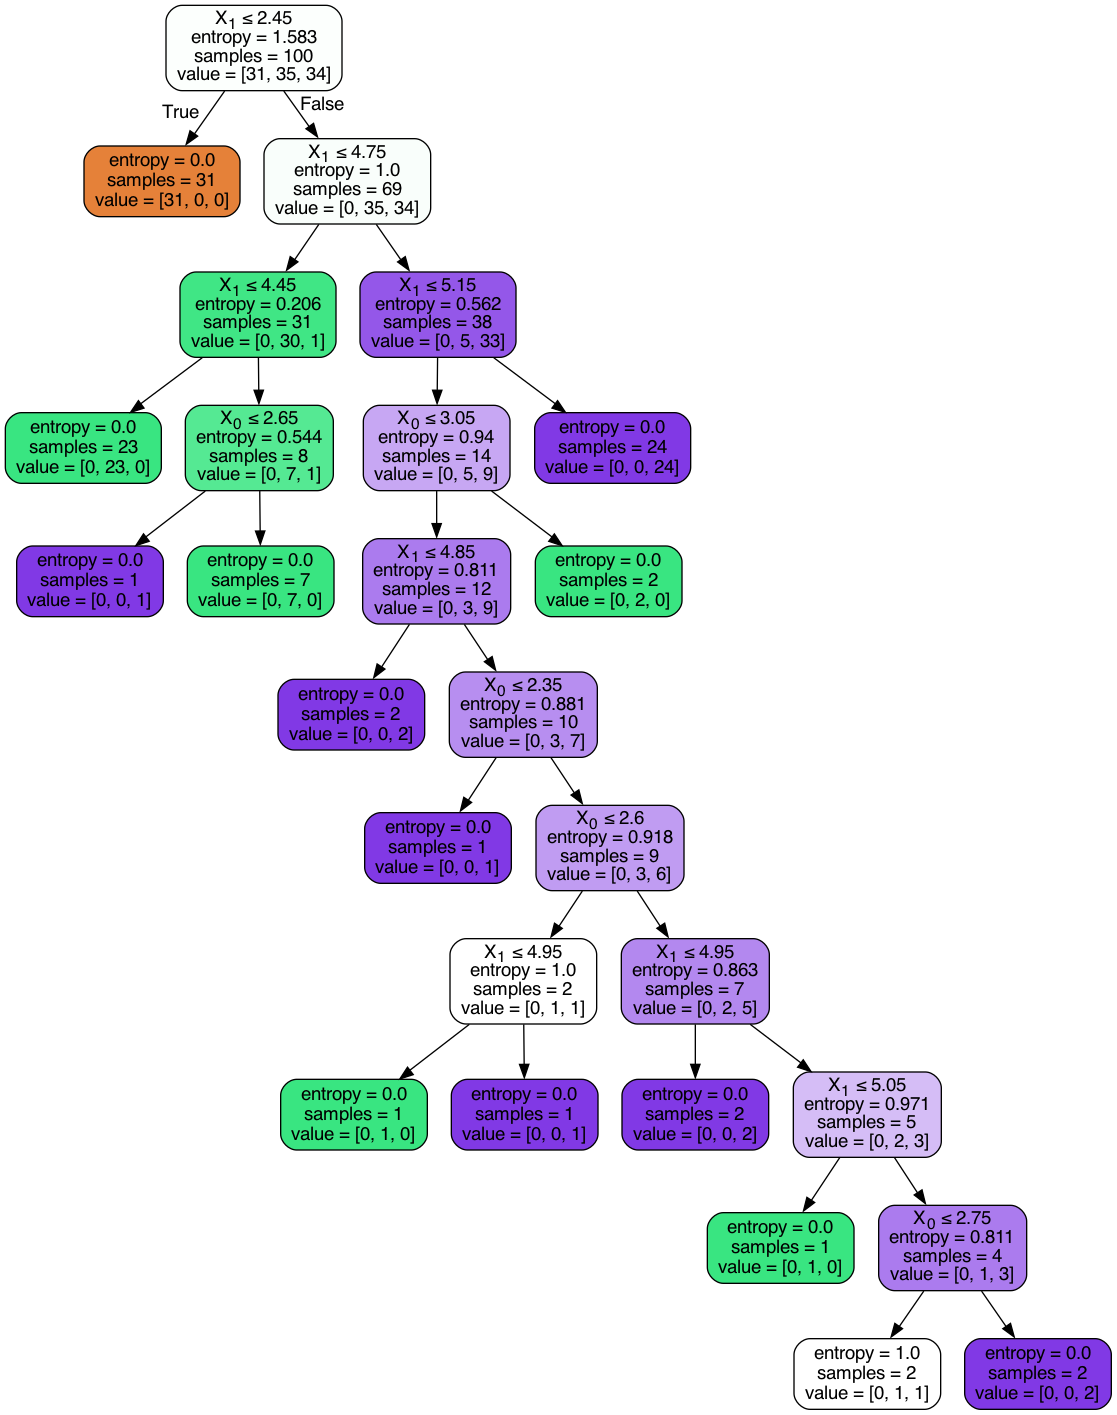

In [32]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dat = export_graphviz(clf_entropy, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)  
graph.write_png('entropy.png')
Image(graph.create_png())

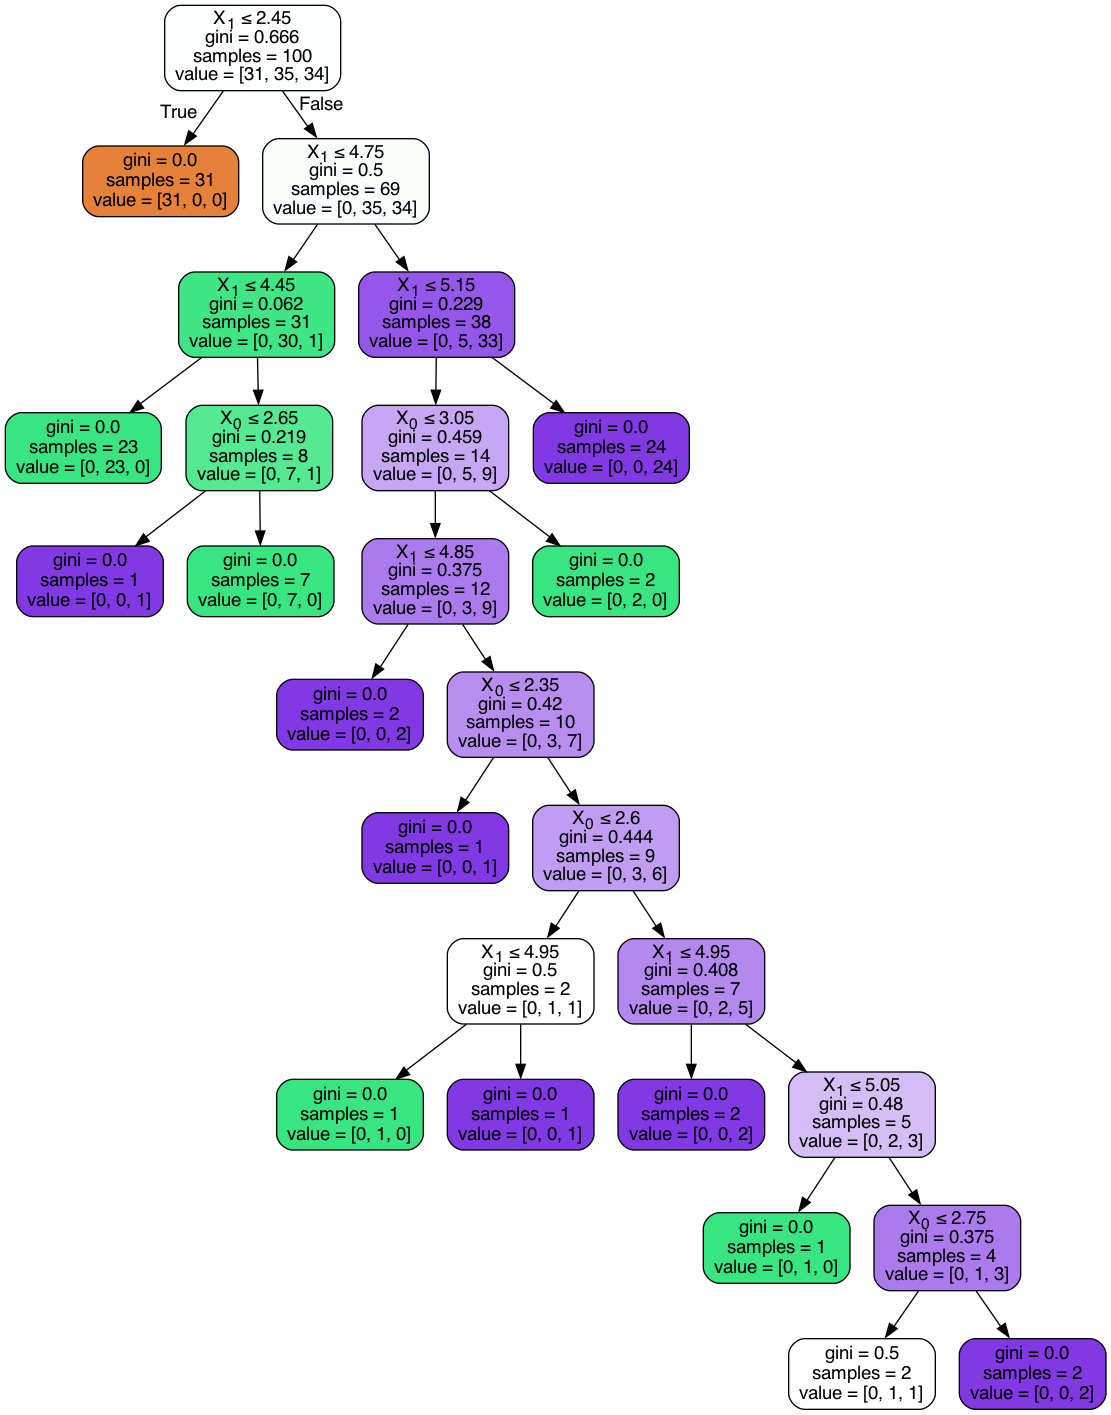

In [33]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dat = export_graphviz(clf_gini, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)  
graph.write_png('gini.png')
Image(graph.create_png())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/kv/s9l8zj153pz4kzhq1rjwl_q80000gn/T/ipykernel_39449/1926006081.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

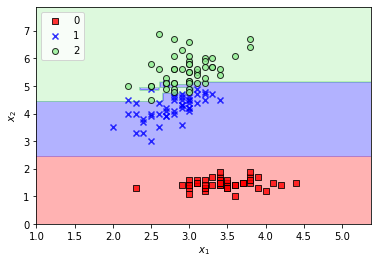

In [34]:
plot_decision_regions(X=X, y=y, classifier=clf_gini)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

## 3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty.

<AxesSubplot:>

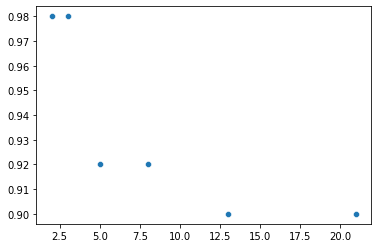

In [45]:
from sklearn import metrics
import seaborn as sns

depths = [2, 3, 4, 5, 8, 13, 21]
scores = []
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, clf.predict(X_test)))

sns.scatterplot(x=depths, y=scores)

## 4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

<AxesSubplot:>

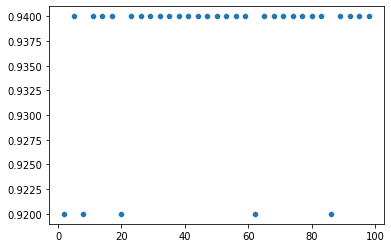

In [74]:
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

trees = range(2, 100, 3)
scores = []
for tree_count in trees:
    clf = RandomForestClassifier(tree_count)
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

sns.scatterplot(x=trees, y=scores)

# Program